ejemplo clasificacion keras churm_Modelling


The Dataset: Bank Customer Churn Modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
Min_Max = preprocessing.MinMaxScaler()
Ordinal =preprocessing.OrdinalEncoder()


def one_hot_cols(df,cols_to_one):
    one_hot=pd.get_dummies(df,cols_to_one,columns=cols_to_one)
    return one_hot


def fit_cols(df, cols_to_fit,fit_function ):
    for col in cols_to_fit:
        df[col] = pd.DataFrame(fit_function.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df


def split_Dataset(mypandas, cols_for_Y,size=0.2,state=1):
    
    X =  mypandas.drop(cols_for_Y, axis=1)
    Y = mypandas[cols_for_Y]
    X.head()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=size, random_state=state)
    return X_train.to_numpy(), X_test.to_numpy(), Y_train.to_numpy(), Y_test.to_numpy()



In [2]:
data_origin = pd.read_csv(r'data/Churn_Modelling.csv')
dataset = data_origin.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
dataset= fit_cols(dataset,['Gender','Geography'],Ordinal)
dataset= fit_cols(dataset,dataset.columns,Min_Max)
dataset.head(20)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
5,0.590,1.0,1.0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1.0
6,0.944,0.0,1.0,0.432432,0.7,0.000000,0.333333,1.0,1.0,0.050261,0.0
7,0.052,0.5,0.0,0.148649,0.4,0.458540,1.000000,1.0,0.0,0.596733,1.0
8,0.302,0.0,1.0,0.351351,0.4,0.566170,0.333333,0.0,1.0,0.374680,0.0
9,0.668,0.0,1.0,0.121622,0.2,0.536488,0.000000,1.0,1.0,0.358605,0.0


In [3]:


X_train, X_test, Y_train, Y_test = split_Dataset(dataset,['Exited'])
print(np.shape(X_train),np.shape(Y_train))
print(np.shape(X_test),np.shape(Y_test))

(8000, 10) (8000, 1)
(2000, 10) (2000, 1)


In [5]:

from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop


import matplotlib.pyplot as plt


def Show_History(History):
    # summarize history for accuracy
    plt.plot(History.history['accuracy'])
    plt.plot(History.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(History.history['loss'])
    plt.plot(History.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

np.random.seed(7)



Adam=optimizers.Adam(lr=0.05)
Sgd=optimizers.SGD(lr=0.01)



In [6]:
def Model1():
    model = Sequential()
    model.add(Dense(20,input_dim=10,activation='relu'))
    model.add(Dense(15,activation='relu'))
    
    
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model



M=Model1()


Epoch 1/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3262 - accuracy: 0.8629 - val_loss: 0.3430 - val_accuracy: 0.8610
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3239 - accuracy: 0.8658 - val_loss: 0.3401 - val_accuracy: 0.8650
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.8670 - val_loss: 0.3463 - val_accuracy: 0.8570
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.8674 - val_loss: 0.3434 - val_accuracy: 0.8625
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3205 - accuracy: 0.8664 - val_loss: 0.3451 - val_accuracy: 0.8605
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3221 - accuracy: 0.8685 - val_loss: 0.3415 - val_accuracy: 0.8645
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.3202 - accuracy: 0.8673 - val_loss: 0.3512 - val_accuracy: 0.8520
Epoch 

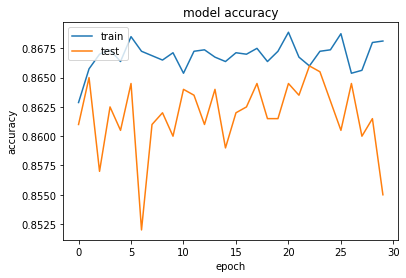

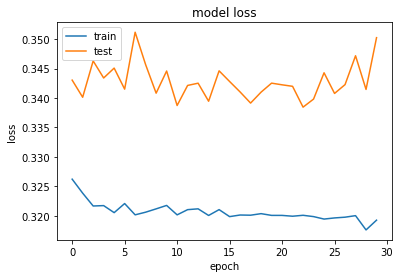

In [14]:
History=M.fit(X_train,Y_train,
              epochs=30,
              batch_size=10,
              validation_data=(X_test,Y_test))

Show_History(History)